In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.metrics import *
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2023-04-23 15:41:24.880411: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-23 15:41:24.919517: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-23 15:41:24.920120: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 15:41:25.700735: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
METRICS = [tf.keras.metrics.CategoricalAccuracy(name = 'accuracy'),
           TruePositives(thresholds = 0.5, name = 'tp'),
           TrueNegatives(thresholds = 0.5, name = 'tn'),
           FalsePositives(thresholds = 0.5, name = 'fp'),
           FalseNegatives(thresholds = 0.5, name = 'fn'),
           PrecisionAtRecall(recall = 0.5, name = 'precision'),
           SensitivityAtSpecificity(0.5, name = 'sensitivity'),
           SpecificityAtSensitivity(sensitivity = 0.5,
                              name = 'specificity'),
           Recall(name='recall')]

2023-04-23 15:41:27.076534: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-23 15:41:27.077045: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
wine = load_wine()
x = wine.data
y = wine.target


In [4]:
print(wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [5]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [6]:
print(x)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [7]:
y = tf.keras.utils.to_categorical(y)
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [8]:
print(x.shape)
print(y.shape)


(178, 13)
(178, 3)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                   test_size = 0.1,
                                                   random_state = 42)

In [10]:
print(X_train.shape)
print(X_test.shape)

(160, 13)
(18, 13)


In [11]:
model = Sequential([
    Dense(64,
         activation = 'relu',
         input_shape = (13,)),
    Dense(32,
         activation = 'relu'),
    Dropout(0.2),
    Dense(24,
         activation = 'relu'),
    Dropout(0.2),
    Dense(16,
         activation = 'relu'),
    Dropout(0.2),
    Dense(12,
         activation = 'relu'),
    Dropout(0.2),
    Dense(6,
         activation = 'relu'),
    Dropout(0.2),
    Dense(4,
         activation = 'relu'),
    Dense(4,
         activation = 'relu'),
    Dense(3,
         activation = 'softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                400       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0

In [13]:
learning_rate = ReduceLROnPlateau(monitor = 'accuracy',
                                min_lr = 0.0002,
                                verbose = 1)

In [14]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = [METRICS])

In [15]:
%time

hist = model.fit(X_train,
                y_train,
                steps_per_epoch = 20,
                epochs = 100,
                validation_data = (X_test, y_test),
                callbacks = [learning_rate],
                verbose = 1)

CPU times: user 10 µs, sys: 2 µs, total: 12 µs
Wall time: 22.9 µs
Epoch 1/100
20/20 [==============================] - 2s 25ms/step - loss: 1.0954 - accuracy: 0.3938 - tp: 0.0000e+00 - tn: 320.0000 - fp: 0.0000e+00 - fn: 160.0000 - precision: 0.3631 - sensitivity: 0.2188 - specificity: 0.2875 - recall: 0.0000e+00 - val_loss: 1.0914 - val_accuracy: 0.5556 - val_tp: 0.0000e+00 - val_tn: 36.0000 - val_fp: 0.0000e+00 - val_fn: 18.0000 - val_precision: 0.5217 - val_sensitivity: 0.6667 - val_specificity: 0.6944 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 1.0926 - accuracy: 0.4437 - tp: 0.0000e+00 - tn: 320.0000 - fp: 0.0000e+00 - fn: 160.0000 - precision: 0.4185 - sensitivity: 0.5938 - specificity: 0.5875 - recall: 0.0000e+00 - val_loss: 1.0783 - val_accuracy: 0.6111 - val_tp: 0.0000e+00 - val_tn: 36.0000 - val_fp: 0.0000e+00 - val_fn: 18.0000 - val_precision: 0.4828 - val_sensitivity: 0.7778 - val_specificity: 0.5833 - val_r

Epoch 19/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3405 - accuracy: 0.7125 - tp: 111.0000 - tn: 294.0000 - fp: 26.0000 - fn: 49.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.6938 - val_loss: 0.2096 - val_accuracy: 0.7778 - val_tp: 14.0000 - val_tn: 35.0000 - val_fp: 1.0000 - val_fn: 4.0000 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 0.7778 - lr: 0.0010
Epoch 20/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4535 - accuracy: 0.6938 - tp: 106.0000 - tn: 304.0000 - fp: 16.0000 - fn: 54.0000 - precision: 0.9886 - sensitivity: 0.9875 - specificity: 0.9969 - recall: 0.6625 - val_loss: 0.2139 - val_accuracy: 0.7778 - val_tp: 14.0000 - val_tn: 36.0000 - val_fp: 0.0000e+00 - val_fn: 4.0000 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 0.7778 - lr: 0.0010
Epoch 21/100
20/20 [==============================] - 0s 3ms/step - loss: 

Epoch 37/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2337 - accuracy: 0.9500 - tp: 152.0000 - tn: 313.0000 - fp: 7.0000 - fn: 8.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9500 - val_loss: 0.1238 - val_accuracy: 1.0000 - val_tp: 18.0000 - val_tn: 36.0000 - val_fp: 0.0000e+00 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 1.0000 - lr: 0.0010
Epoch 38/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1778 - accuracy: 0.9812 - tp: 157.0000 - tn: 317.0000 - fp: 3.0000 - fn: 3.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9812 - val_loss: 0.1208 - val_accuracy: 1.0000 - val_tp: 18.0000 - val_tn: 36.0000 - val_fp: 0.0000e+00 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 1.0000 - lr: 0.0010
Epoch 39/100
20/20 [==============================] - 0s 4ms/step 

Epoch 54/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2115 - accuracy: 0.9563 - tp: 153.0000 - tn: 313.0000 - fp: 7.0000 - fn: 7.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9563 - val_loss: 0.0892 - val_accuracy: 1.0000 - val_tp: 18.0000 - val_tn: 36.0000 - val_fp: 0.0000e+00 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 1.0000 - lr: 2.0000e-04
Epoch 55/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1273 - accuracy: 0.9937 - tp: 159.0000 - tn: 319.0000 - fp: 1.0000 - fn: 1.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9937 - val_loss: 0.0885 - val_accuracy: 1.0000 - val_tp: 18.0000 - val_tn: 36.0000 - val_fp: 0.0000e+00 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 1.0000 - lr: 2.0000e-04
Epoch 56/100
20/20 [==============================] - 0s 3

20/20 [==============================] - 0s 4ms/step - loss: 0.1339 - accuracy: 0.9812 - tp: 157.0000 - tn: 317.0000 - fp: 3.0000 - fn: 3.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9812 - val_loss: 0.0655 - val_accuracy: 1.0000 - val_tp: 18.0000 - val_tn: 36.0000 - val_fp: 0.0000e+00 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 1.0000 - lr: 2.0000e-04
Epoch 89/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1476 - accuracy: 0.9688 - tp: 155.0000 - tn: 315.0000 - fp: 5.0000 - fn: 5.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9688 - val_loss: 0.0648 - val_accuracy: 1.0000 - val_tp: 18.0000 - val_tn: 36.0000 - val_fp: 0.0000e+00 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 1.0000 - lr: 2.0000e-04
Epoch 90/100
20/20 [==============================] - 0s 3ms/step - los

In [16]:
print(hist.history)

{'loss': [1.095373511314392, 1.0925568342208862, 1.0633927583694458, 1.0306164026260376, 0.9328282475471497, 0.8955749273300171, 0.8057253956794739, 0.7293907403945923, 0.6290274262428284, 0.6344960927963257, 0.5654046535491943, 0.5124346613883972, 0.5633998513221741, 0.48268523812294006, 0.4839355945587158, 0.4290195405483246, 0.402261346578598, 0.3677603006362915, 0.3405497670173645, 0.4534761905670166, 0.349030464887619, 0.33005818724632263, 0.3211730122566223, 0.3551505208015442, 0.3284553587436676, 0.3178102374076843, 0.3449990153312683, 0.2827453017234802, 0.27494484186172485, 0.22418639063835144, 0.23332424461841583, 0.2578512728214264, 0.2314266711473465, 0.2281246930360794, 0.22595253586769104, 0.18182273209095, 0.23367607593536377, 0.1778288632631302, 0.20688994228839874, 0.24851691722869873, 0.19471891224384308, 0.17055894434452057, 0.15992793440818787, 0.27050095796585083, 0.16318897902965546, 0.17633743584156036, 0.1450028121471405, 0.16480551660060883, 0.21428994834423065

In [17]:
acc = hist.history['accuracy']
loss = hist.history['loss']
fp = hist.history['fp']
fpv = hist.history['val_fp']
fn = hist.history['fn']
fnv = hist.history['val_fn']
tp = hist.history['tp']
tpv = hist.history['val_tp']
tn = hist.history['tn']
tnv= hist.history['val_tn']
FP = hist.history['fp'][-1]
FN = hist.history['fn'][-1]
TP = hist.history['tp'][-1]
TN = hist.history['tn'][-1]
LOSS = hist.history['loss'][-1]
LOSSV = hist.history['val_loss'][-1]
ACC = hist.history['accuracy'][-1]
ACCV = hist.history['val_accuracy'][-1]
PRE = hist.history['precision'][-1]
PREV = hist.history['val_precision'][-1]
REC = hist.history["recall"][-1]
RECV = hist.history["val_recall"][-1]
LR = hist.history['lr'][-1]

In [18]:
accU10 = np.mean(acc[-10])
tpU10 = np.mean(tp[-10])
fpU10 = np.mean(fp[-10])
tnU10 = np.mean(tn[-10])
fnU10 = np.mean(fn[-10])

print('Média das últimas 10 época de processamento')
print(f'Verdadeiros Positivos: {tpU10}')
print(f'Falsos Positivos: {fpU10}')
print(f'Verdadeiros Negativos: {tnU10}')
print(f'Falsos Negativos: {fnU10}')
print('-----------------------------------------------')
print(f'Acurácia da Matriz de Confusão: {round(accU10, 2)*100-2}%')

Média das últimas 10 época de processamento
Verdadeiros Positivos: 160.0
Falsos Positivos: 0.0
Verdadeiros Negativos: 320.0
Falsos Negativos: 0.0
-----------------------------------------------
Acurácia da Matriz de Confusão: 98.0%


In [19]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
FDR = FP/(TP+FP)

OACC = (TP+TN)/(TP+FP+FN+TN)
ACCCM = (TP+TN)/(TN + TP + FP + FN)
FM = (2 * PRE * REC)/(PRE + REC)
F1S = 2*((PRE*REC))/(PRE+REC)
F1S2 = 2 * TP/(2 * TP + FP + FN)

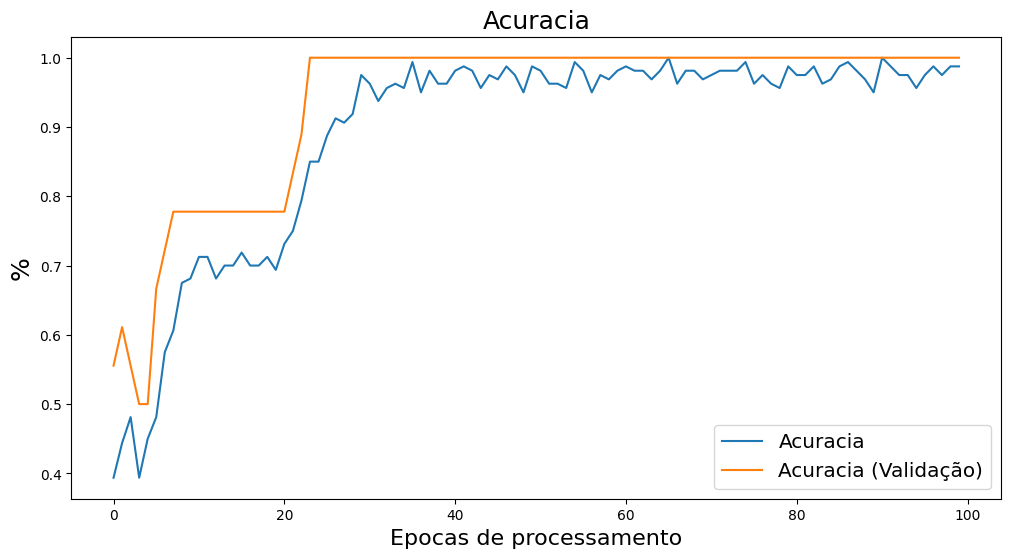

In [20]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Acuracia',
           'Acuracia (Validação)'],
          loc = 'lower right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel("%", fontsize = 18)
plt.title('Acuracia', fontsize = 18)
plt.show()

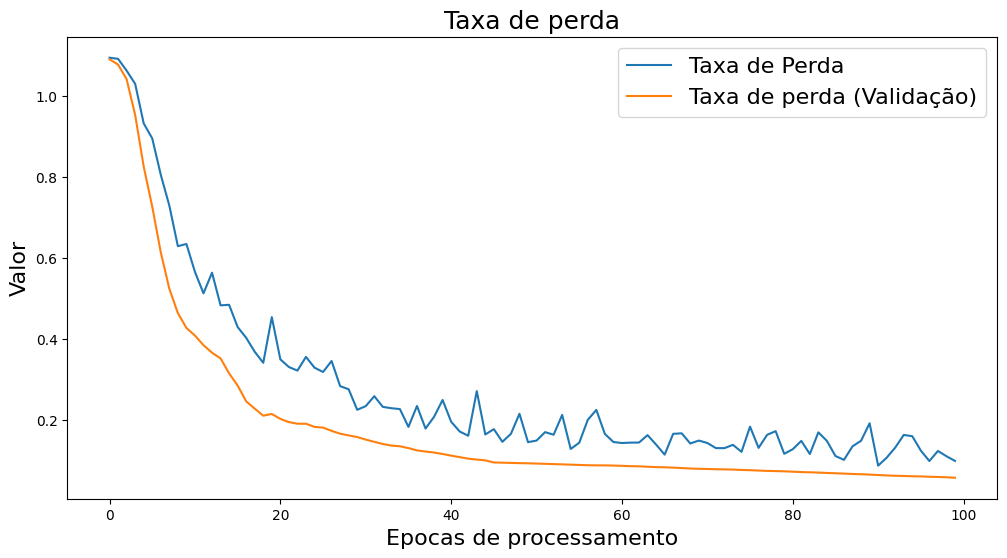

In [21]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Taxa de Perda',
           'Taxa de perda (Validação)'],
          loc = 'upper right', fontsize = 16)
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Valor', fontsize = 16)
plt.title('Taxa de perda', fontsize = 18)
plt.show()

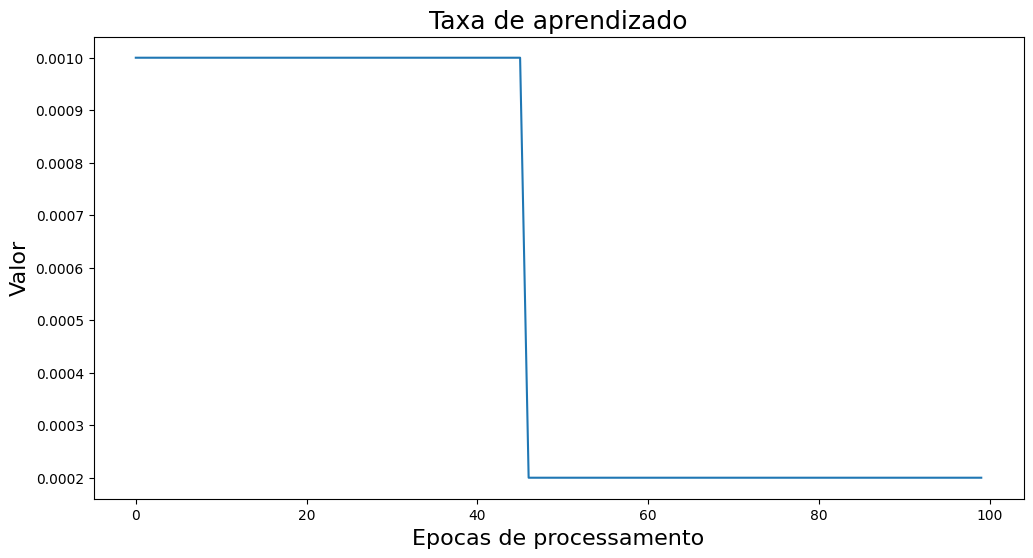

In [22]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['lr'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Valor', fontsize = 16)
plt.title('Taxa de aprendizado', fontsize = 18)
plt.show()

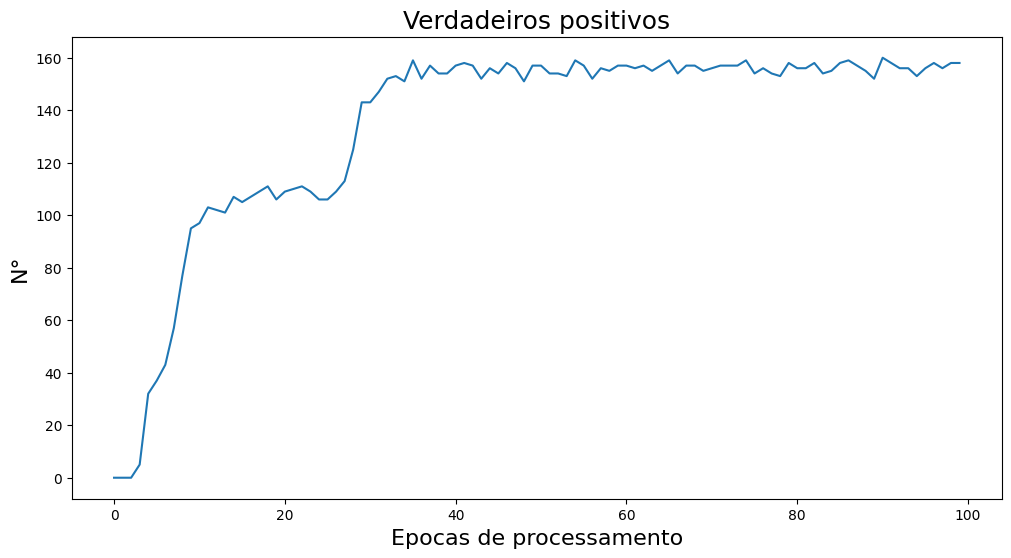

In [23]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Verdadeiros positivos', fontsize = 18)
plt.show()

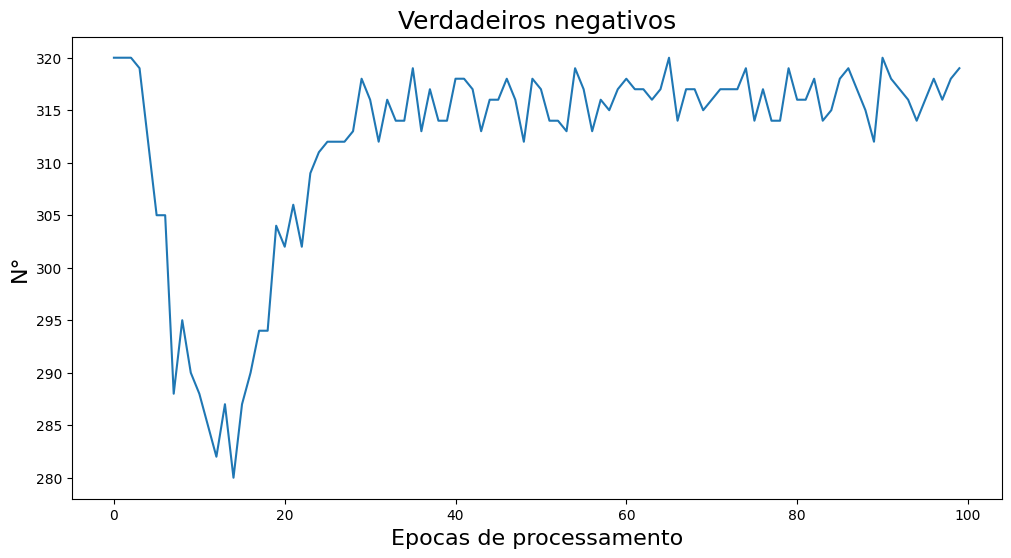

In [24]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Verdadeiros negativos', fontsize = 18)
plt.show()

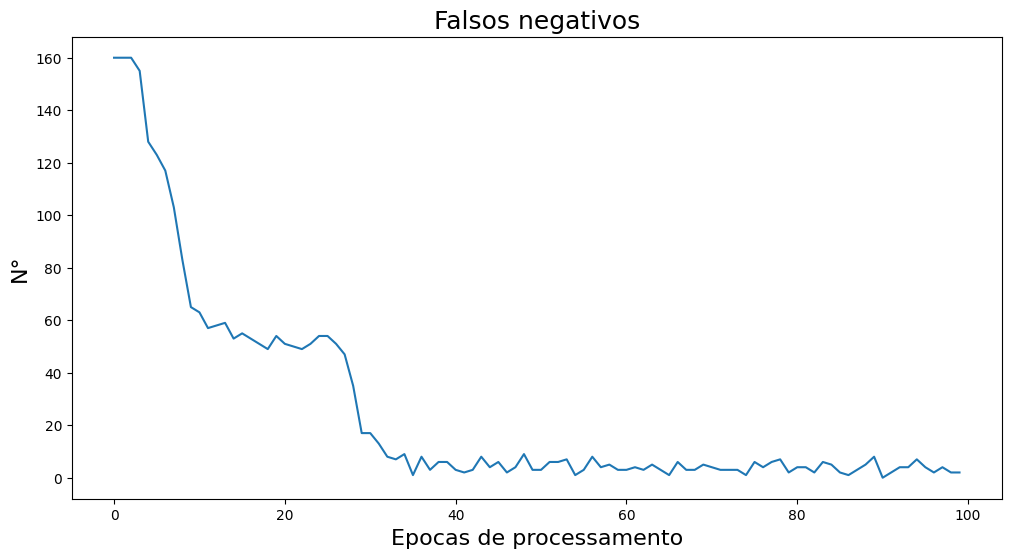

In [25]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Falsos negativos', fontsize = 18)
plt.show()

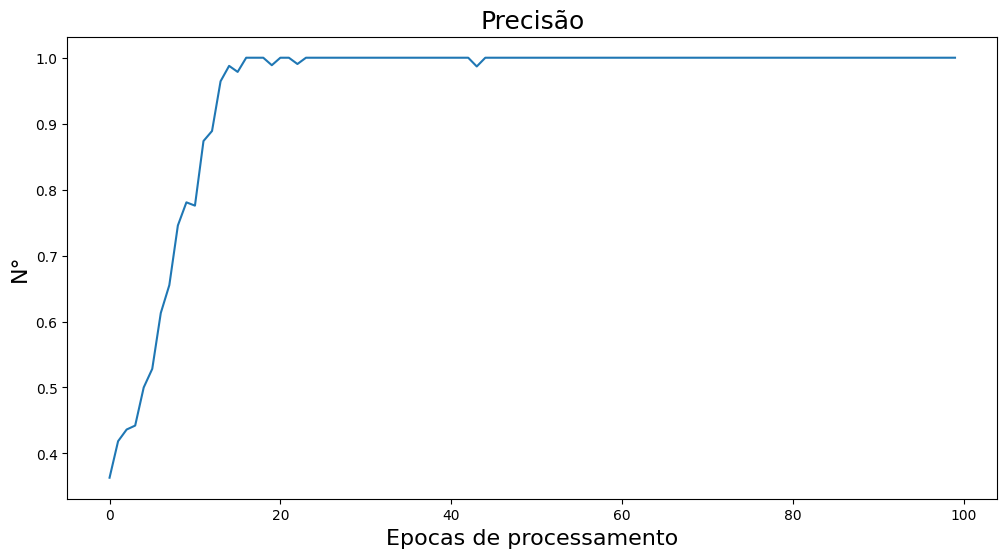

In [26]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['precision'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Precisão', fontsize = 18)
plt.show()

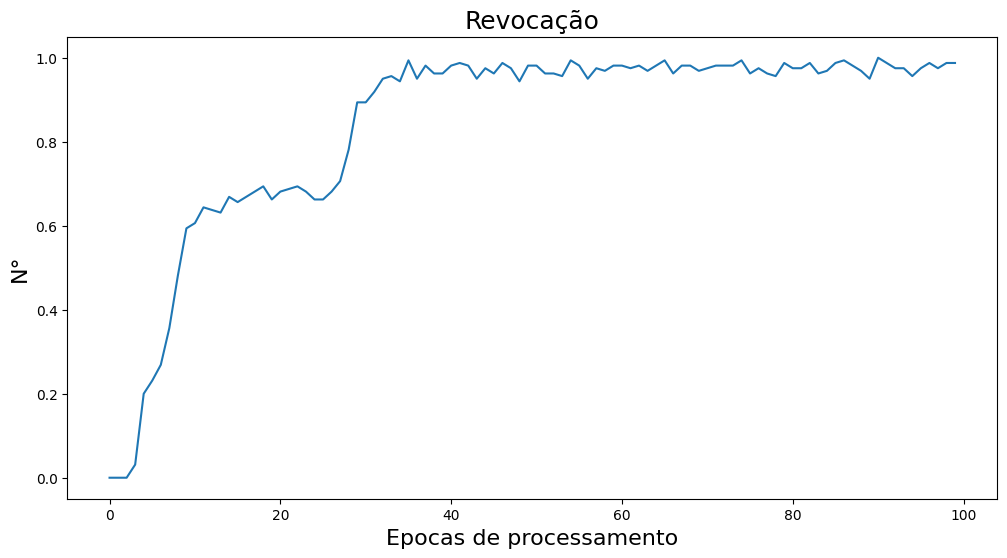

In [27]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['recall'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Revocação', fontsize = 18)
plt.show()

Text(0.5, 1.0, 'Numeros de Positivos e Negativos')

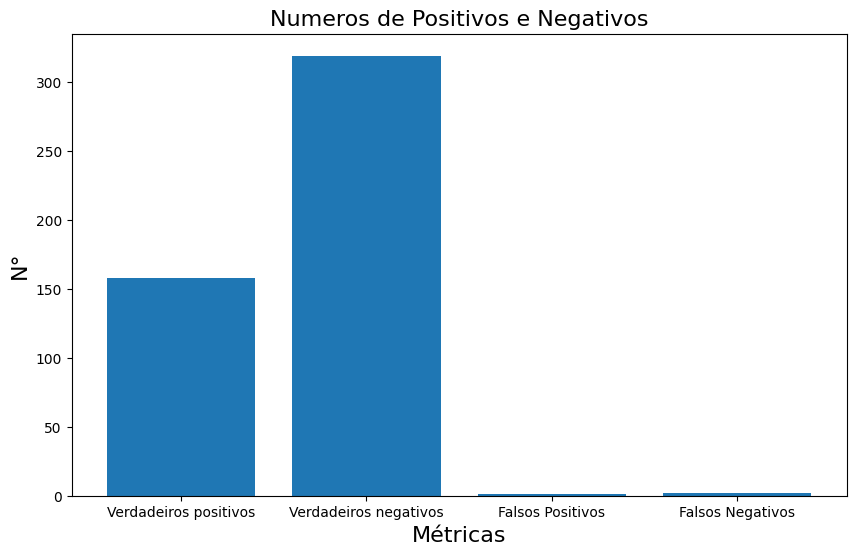

In [28]:
data = {'Verdadeiros positivos': TP,
        'Verdadeiros negativos': TN,
        'Falsos Positivos': FP,
        'Falsos Negativos': FN}
modelos = list(data.keys())
valores = list(data.values())

fig = plt.figure(figsize = (10,6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize = 16)
plt.ylabel("N°", fontsize = 16)
plt.title("Numeros de Positivos e Negativos", fontsize = 16)

In [29]:
loss_final = hist.history['loss'][-1]
loss_finalv = hist.history['val_loss'][-1]
acc_final = hist.history['accuracy'][-1] * 100

In [30]:
print('RELATORIO FINAL (METRICAS DE AUTOAVALIACAO)')
print('--------------------------------------------')
print(f'Acuracia Final: {round(acc_final, 2)-2}%')
print(f'Acuracia Geral: {round(OACC, 2)*100-2}%')
print(f'Acuracia Media (Media ultimas 10 epocas): {round(accU10, 2)*100-2}%')
print(f'Acuracia (Treinamento): {round(ACC, 2)*100-2}%')
print(f'Acuracia (Validação): {round(ACCV, 2)*100-2}%')
print(f'Taxa de perda: {round(LOSS, 2)}%')
print(f'Taxa de perda (Validação): {round(LOSSV, 2)}%')
print(f'Precisao: {round(PRE, 2)*100-2}%')
print(f'Precisao (Validação): {round(OACC, 2)*100-2}%')
print(f'Revocação: {round(REC, 2)*100-2}%')
print(f'Revocação (Validação): {round(RECV, 2)*100-2}%')
print(f'F1 Score: {round(F1S, 2)*100-2}%')
print(f'F-Score: {round(FM, 2)*100-2}%')
print(f'F1 Score(VP, FP, VN, FN): {round(F1S2, 2)*100-2}%')
print(f'Taxa de aprendizado: {LR}')
print(f'Sensibilidade: {round(TPR, 2)*100-2}%')
print(f'Especificidade: {round(TNR, 2)*100-2}%')
print(f'Acuracia da Matriz Confusao: {round(ACCCM, 2)*100}%')
print(f'Taxa de verdadeiros positivos: {round(PPV, 2)*100}%')
print(f'Taxa de Verdadeiros negativos: {round(NPV, 2)*100}%')
print(f'Taxa de falsos positivos: {round(FPR, 2)*100}%')
print(f'Taxa de falsos negativos: {round(FNR, 2)*100}%')
print(f'Dados Invalidos: {round(FDR, 2)*100}%')

RELATORIO FINAL (METRICAS DE AUTOAVALIACAO)
--------------------------------------------
Acuracia Final: 96.75%
Acuracia Geral: 97.0%
Acuracia Media (Media ultimas 10 epocas): 98.0%
Acuracia (Treinamento): 97.0%
Acuracia (Validação): 98.0%
Taxa de perda: 0.1%
Taxa de perda (Validação): 0.06%
Precisao: 98.0%
Precisao (Validação): 97.0%
Revocação: 97.0%
Revocação (Validação): 98.0%
F1 Score: 97.0%
F-Score: 97.0%
F1 Score(VP, FP, VN, FN): 97.0%
Taxa de aprendizado: 0.00019999999494757503
Sensibilidade: 97.0%
Especificidade: 98.0%
Acuracia da Matriz Confusao: 99.0%
Taxa de verdadeiros positivos: 99.0%
Taxa de Verdadeiros negativos: 99.0%
Taxa de falsos positivos: 0.0%
Taxa de falsos negativos: 1.0%
Dados Invalidos: 1.0%
